# Lab 1: Exploratory Data Analysis (EDA)

This lab exercise demonstrates EDA of an example dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> "At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a> 

## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file.
The file loans_train.csv is expected to be in the same directory as this notebook.

In [2]:
df = pd.read_csv('loans_train.csv')
# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

We can see that the dataset has 614 data rows, and both numerical and categorical attributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

The last attribute `Loan_Status` indicates whether a loan was granted (Y) or not (N). This attribute would be a primary candidate for an attribute to *learn* to predict from the values of the other attributes. Before building a predictive model, though, the first step is to get to know the dataset better (the goal of this exercise) and prepare it for machine learning (the goal of the next exercise).

#### B.1. Quick Examination of Numerical Attributes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

There are a few inferences we can draw by looking at the output of `describe()`:

- `LoanAmount` has (614 – 592) 22 missing values.
- `Loan_Amount_Term` has (614 – 600) 14 missing values.
- `Credit_History` has (614 – 564) 50 missing values.

Note that `Credit_History` is rather a categorical attribute despite having numerical values. We can see that about 84% of the applicants have a credit history. How? `Credit_History` has value 1 for those who have a credit history, and 0 otherwise. The mean of `Credit_History` is 0.84, i.e. 84% of the applicants have a credit history.

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

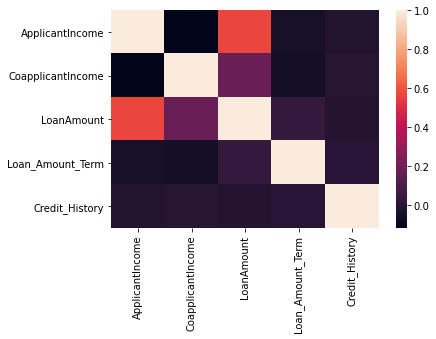

In [6]:
#correlation matrix
sns.heatmap(df.corr());

The heat map suggests correlation greater than 0 between `LoanAmount` and the three attributes `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term`. Although, the most significant correlation is between `LoanAmount` and `ApplicantIncome`. That is, applicants with low income tend to request lower loan amounts than applicants with higher income according to the examples in the dataset.

We can further examine the pairwise distribution between `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term` a **pair plot**.

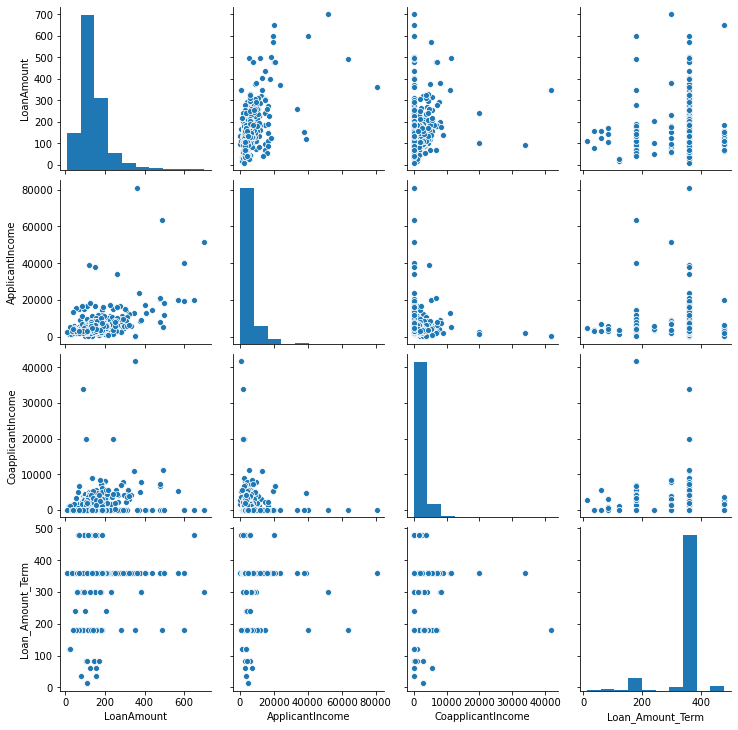

In [7]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

#### B.2. Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. `Property_Area`, `Gender`, `Education`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `Gender` the frequency table can be printed by the command:

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

We can see that the number of males in the dataset is more than three times larger than the number of females. We can also check the total count of values in column `Gender` with the command:

In [9]:
df['Gender'].count()

601

That is, there are 13 missing values in column `Gender`.

## C. Distribution Analysis for Numerical Atributes

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes. 

Let's take, for example, the numerical attributes `ApplicantIncome` and `LoanAmount`. 

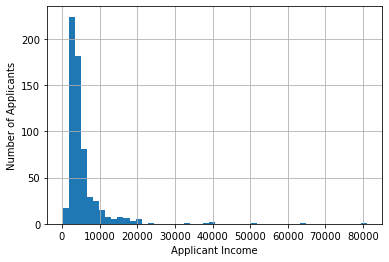

In [10]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Applicants')
plt.show()

In the histogram above, we observe that there are few extreme values of `ApplicantIncome`. The use of 50 bins allows to depict the distribution clearly.

Next, we look at boxp lots to understand the distribution better.

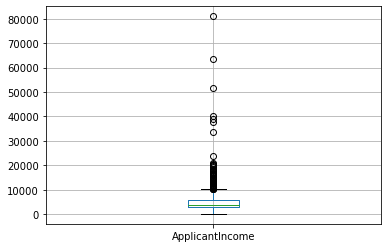

In [11]:
df.boxplot(column='ApplicantIncome')
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

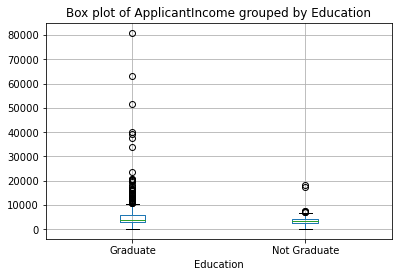

In [12]:
# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='ApplicantIncome', by='Education')
plt.title('Box plot of ApplicantIncome grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is no substantial difference between the mean income of graduates and non-graduates. But there are a higher number of graduates with very high incomes.

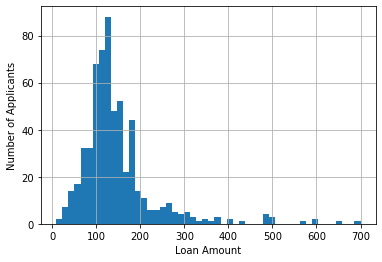

In [13]:
# Next, we examine a histogram of the numerical attribute loanAmount

df['LoanAmount'].hist(bins=50)
plt.xlabel("Loan Amount")
plt.ylabel('Number of Applicants')
plt.show()

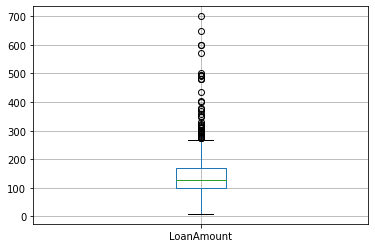

In [14]:
# Boxp lot of LoanAmount
df.boxplot(column='LoanAmount')
plt.show()

Again, there are some extreme values. Clearly, both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing values as well as many extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. We will take this up in the next lab exercise.

Finally, let's examine the relationship between `ApplicantIncome` and `LoanAmount` with a scatter plot.

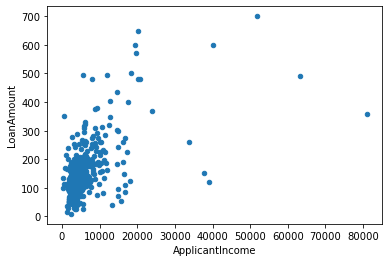

In [15]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')
plt.show()

Based on this scatter plot we can say that LoanAmount probably tends to grow linearly as ApplicantIncome grows. We can see the trend clearer with `Seaborn's regplot`, which draws a line that best fits the relation between two numeric attributes.

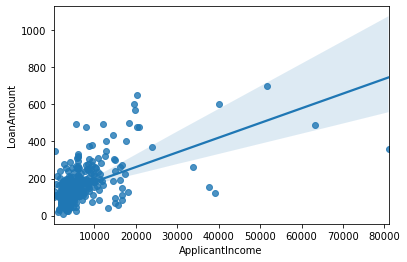

In [16]:
sns.regplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.show()

This regplot suggests that typically LoanAmount is 100 times lower than ApplicantIncome.

## D. Box Plot Variations

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

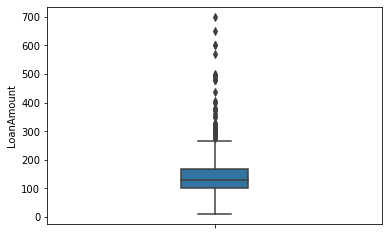

In [17]:
#First, let's draw a seaborn-style box plot for LoanAmount

sns.boxplot(x=df['LoanAmount'], orient='v', width=0.2)
plt.show()

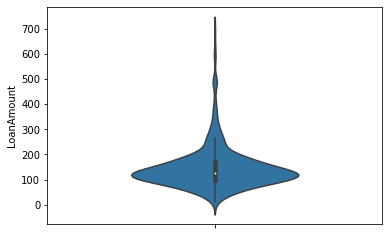

In [18]:
#Violin plot for LoanAmount
sns.violinplot(x=df['LoanAmount'], orient='v', width=0.5)
plt.show()

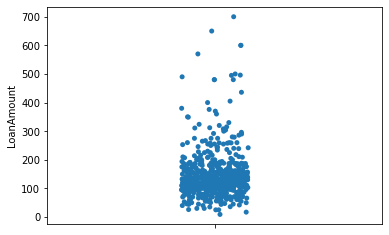

In [19]:
#Strip plot for LoanAmount

sns.stripplot(x=df['LoanAmount'], jitter=True, orient='v')
plt.show()

C:\Users\doran\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\doran\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


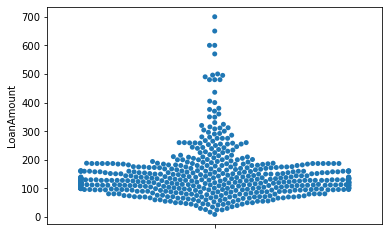

In [20]:
#Swar mplot for LoanAmount

sns.swarmplot(x=df['LoanAmount'], orient='v')
plt.show()

Let's redraw the box plots of `ApplicantIncome` grouped by the categorical attribute `Education` as violin plots.

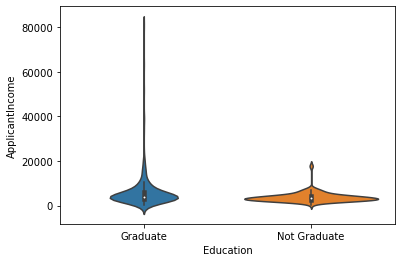

In [21]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

We can split each violin plot by a binary attribute. For example, we can add `Gender` to the plot above as follows.

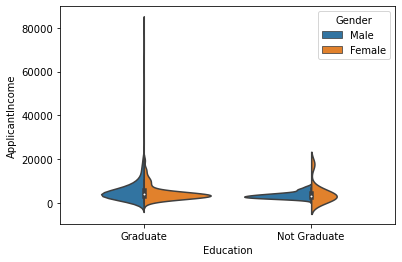

In [22]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome', hue='Gender', split=True)
plt.show()

The plot above suggest that male graduates in our dataset have more even distribution of income than female graduates, while the opposite is true for applicants who are not graduates.

## E. Distribution Analysis for Categorical Attributes

As noted above `Credit_History` is rather a categorical attribute with two categories/values:
- 0 - the applicant has no credic history
- 1 - the applicant has a credit history

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `Credit_History` and `Loan_Status`.

First, let's take a look at the frequency table for attribute `Credit_History`:

In [23]:
frequency_table = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:') 
print(frequency_table)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Next, build a pivot table for `Loan_Status` and `Credit_History`, i.e. find the mean `Loan_Status` for both `Credit_History`=0 and `Credit_History`=1.

In [24]:
pivot_table_LC = df.pivot_table(values='Loan_Status',
                                index='Credit_History',
                                aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()) 

Here the values of `Loan_Status` are grouped by the index `Credit_History`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `Loan_Status` are replaced by 1s and 0s, respectively.

In [25]:
# Print pivot table
print(pivot_table_LC)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


The pivot table can be interprted as follows. The probability for getting a loan is 0.078652 (i.e. ~8%) for applicants with no credit history, and 0.795789 (i.e. ~80%) for applicants with a credit history.

Let's plot `Credit_History` and the probability of getting a loan based on `Credit_History`.

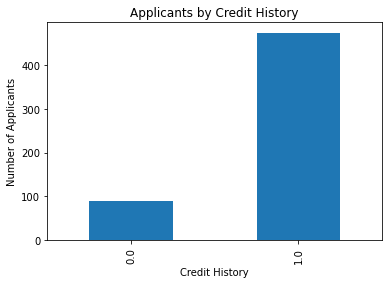

In [26]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Credit History')
plt.show()

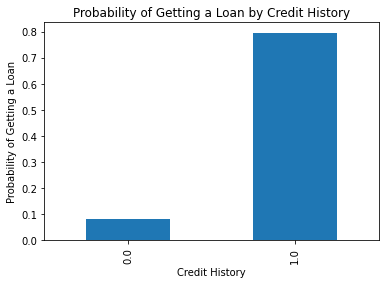

In [27]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Credit History')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

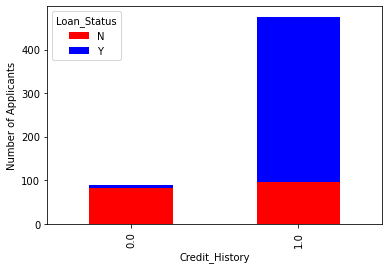

In [28]:
crosstab_CL = pd.crosstab(df['Credit_History'], df['Loan_Status'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

Furthermore, we can stackchart `Credit_History` and `Gender` against `Loan_Status`.

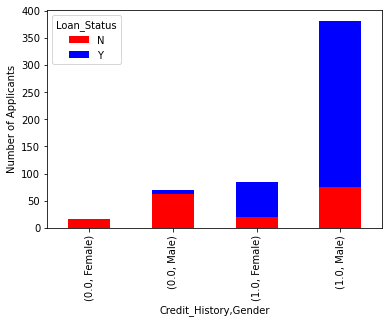

In [29]:
crosstab_CGL = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

The plot above suggests that gender does not play a significant role when taking a decision for granting a loan. However, it is hard to say which gender is more likely to have a loan granted when `Credit_History`=1, for example. To see this clearer, we can build a pivot table with the mean values of `Loan_Status` for each combination of values of `Credit_History` and `Gender` and then visualise this pivot table as a heat map.

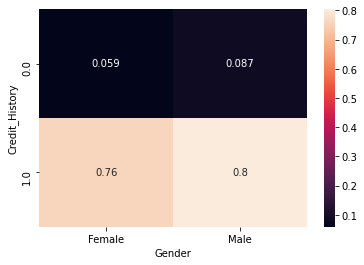

In [30]:
pivot_table_LCG = df.pivot_table(values='Loan_Status', 
                           index='Credit_History', 
                           columns='Gender',
                           aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

We can see now that a male with credit history is slightly more likely to have their loan granted than a female with credit history 1. However, we should not rush to make strong conclusions from this observation yet, because we have not examined how the numerical attributes (e.g., `LoanAmmount` and `ApplicantIncome`) relate to `Gender` and `Loan_Status`.

# Bank Data Set

### Goal is to classify if the client will subscribe a term deposit (variable y)

# bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default?   (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

## T2.1 Formulate a particular Question that might be interesting to answer by exploring this dataset

I think there are a few interesting angles to explore in this data set. Banks in general are always trying to maximise profits. There are two ways to do this increase revenues or decrease costs. So we want to look at the accounts that haven't subscribed and see if there are any customers that would subscribe given additional attention (this would help to increase revenues). We do want to be careful in who we target as if we target leads who have not got the means to subscribe this would be time wastes thus it would be money wasted. 

1) Which of the accounts are most likely to commit to a term deposit?  
2) Have the bank missed out on securing more term deposits?  
3) Have the bank wasted resources in contacting accounts which are unlikely to commit to a term deposit?  
4) Which contact method is most successful?

In [31]:
bank = pd.read_csv('bank.csv')
bank

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    1   apr       957         2    131         2  failure   
1      cellular    1   apr       233         2    133         1  failure   
2      cellular    1   apr       126         2    239         1  failure   
3      cellular    1   apr       274         1    238         2  failure   
4      cellular    1   apr       479         1    307         1  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [64]:
bank.describe()

age       balance          day     duration     campaign  \
count  2000.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.686108   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [91]:
bank['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

This shows that 1000 of our 2000 accounts subscribed to the Term Deposit

### Filling in the blanks
I will fill in the missing age columns with the mean age. This won't have a major detrimental effect because it accounts for such a small proportion of the data set

In [70]:
bank['age'] = bank['age'].fillna(bank['age'].mean())

age  job  marital  education default  balance housing loan    contact  \
255   42.0  NaN   single    primary      no     2398     yes   no   cellular   
257   46.0  NaN  married        NaN      no      677      no   no   cellular   
831   41.0  NaN   single    primary      no     2398     yes   no        NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no   cellular   
1281  50.0  NaN  married        NaN      no      558      no   no   cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no   cellular   
1711  77.0  NaN  married        NaN      no      397      no   no  telephone   
1801  28.0  NaN   single        NaN      no      326      no   no   cellular   
1868  48.0  NaN   single        NaN      no     1819      no   no   cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
255     3   feb       144         2    271         2  failure         no  
257     3   feb       425         1     82         1  failure         no  
831     8   may       287         2     -1         0      NaN         no  
1223   12   aug       265         1     91         5  success        yes  
1281    9   jul       464         1    683         6  failure        yes  
1669   13   may       260         1     91         4  success        yes  
1711    7   may       300         3     -1         0      NaN        yes  
1801   11   oct       450         1    231         1  success        yes  
1868    2   sep      1440         1    458         1  failure        yes  
1975    7   sep       314         1     -1         0      NaN        yes

12 applicants are missing the age field

In [71]:
bank[bank['job'].isnull()]

age  job  marital  education default  balance housing loan    contact  \
255   42.0  NaN   single    primary      no     2398     yes   no   cellular   
257   46.0  NaN  married        NaN      no      677      no   no   cellular   
831   41.0  NaN   single    primary      no     2398     yes   no        NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no   cellular   
1281  50.0  NaN  married        NaN      no      558      no   no   cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no   cellular   
1711  77.0  NaN  married        NaN      no      397      no   no  telephone   
1801  28.0  NaN   single        NaN      no      326      no   no   cellular   
1868  48.0  NaN   single        NaN      no     1819      no   no   cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
255     3   feb       144         2    271         2  failure         no  
257     3   feb       425         1     82         1  failure         no  
831     8   may       287         2     -1         0      NaN         no  
1223   12   aug       265         1     91         5  success        yes  
1281    9   jul       464         1    683         6  failure        yes  
1669   13   may       260         1     91         4  success        yes  
1711    7   may       300         3     -1         0      NaN        yes  
1801   11   oct       450         1    231         1  success        yes  
1868    2   sep      1440         1    458         1  failure        yes  
1975    7   sep       314         1     -1         0      NaN        yes

Group by nulls and see if the missing data is coming from the same people

(array([1463.,    0.,    0.,  325.,    0.,    0.,  202.,    0.,    0.,
          10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

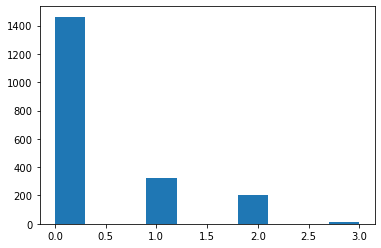

In [73]:
plt.hist(bank.isnull().sum(axis = 1))

This shows the amount of people missing various levels of data

## T2.2 Calculate Statistics for the numerical and categorical attributes, draw a short conclusion

### Corrolation Matrix with R_scores

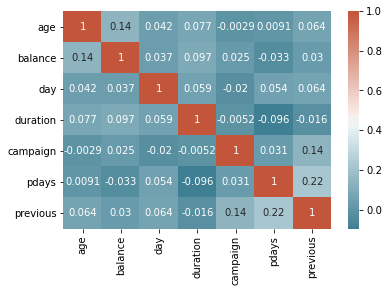

In [52]:
corr = sns.heatmap(bank.corr(), annot = True, 
                   cmap = sns.diverging_palette(220, 20, 
                   as_cmap = True))

I want to look at which information is most important for the Subscribed column, I will need to change this to binary 1, 0 instead of yes or no

In [88]:
bank['subscribed_binary'] = pd.Series(np.where(bank['subscribed'].values == 'yes', 1, 0),
          bank.index)
bank.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  subscribed_binary  
0         no                  0  
1         no                  0  
2         no                  0  
3         no                  0  
4         no                  0

Now I can add subscribed to my correlation matrix

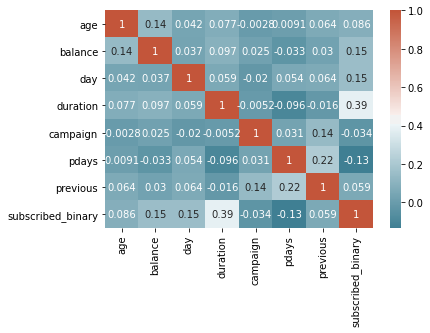

In [89]:
corr1 = sns.heatmap(bank.corr(), annot = True, 
                   cmap = sns.diverging_palette(220, 20, 
                   as_cmap = True))

It is interesting to see that duration has a bigger influence on the outcome than balance. I think the day some information such as day isn't relavent in this scenario.

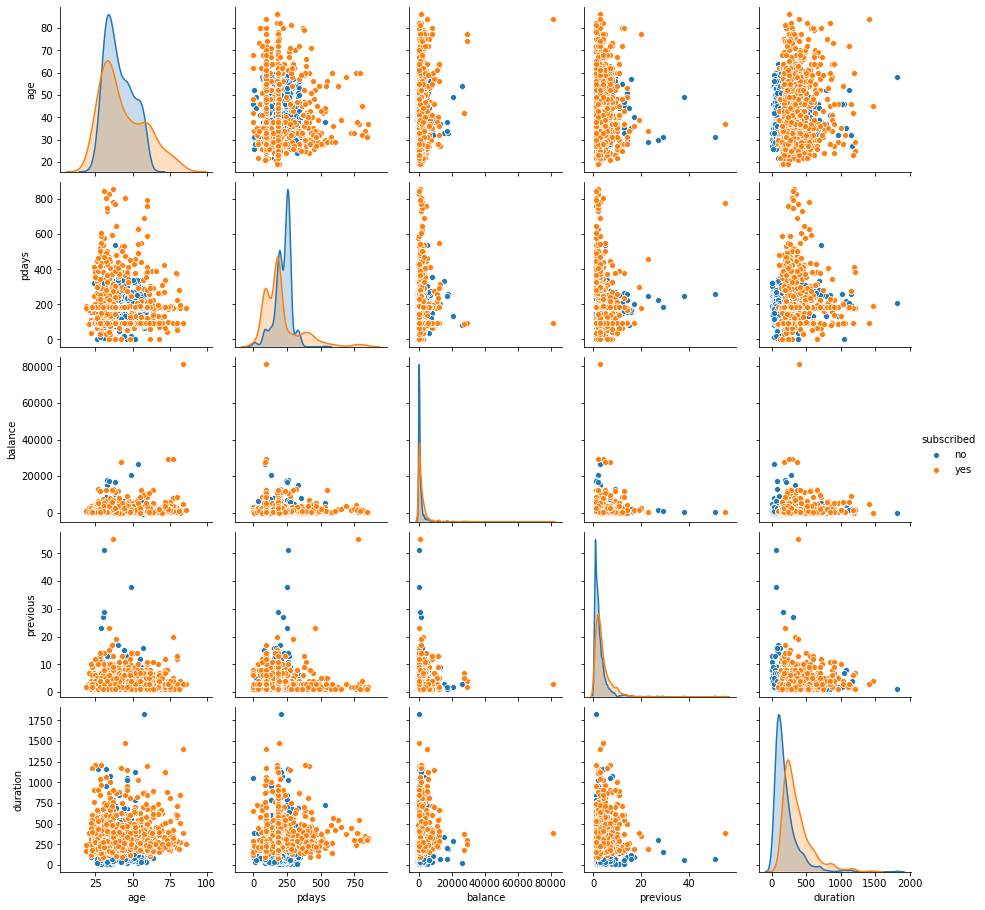

In [90]:
clean_bank = bank.dropna()
values = ['age', 'pdays', 'balance', 'previous', 'subscribed', 'duration']
sns.pairplot(data=clean_bank[values], hue = 'subscribed')

If you look at previous and balance plot,  you cans see that the marketing team have contacted a few account holders with very low balances a relatively large number of times. It seems that most account holders sign up within the first 20 calls. This would be a good point to stop calling.  

You can also see that there are a few account holders with large balances who have only been contacted a handful of times. These should be targeted.

In general it seems as though there are far more orange dots than brue dots. I should see if the proportion of subscribed now that we dropped NA

In [92]:
clean_bank['subscribed'].value_counts()

no     804
yes    659
Name: subscribed, dtype: int64

This shows, that the reasons for my suspicions were incorrect but, there are actually a larger number of none subscribed personel in the cleaned data. It makes me think that I should look into the discarded data categories in more detail

Text(0.5, 0.98, '')

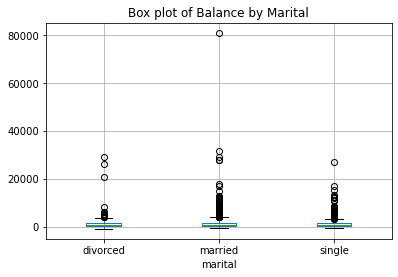

In [39]:
bank.boxplot(column = 'balance', by = 'marital')
plt.title('Box plot of Balance by Marital')
plt.suptitle("") 

We can see that in general divorced people have a much lower balance which would suggest they may be less willing to commit to a term desposit. But the correlation is very weak.

In [98]:
bank.groupby(['marital']).mean()


age      balance        day    duration  campaign       pdays  \
marital                                                                         
divorced  48.609302  1483.344186  14.832558  293.520930  1.865116  178.627907   
married   45.834405  1500.935194  13.288029  288.735374  1.911791  170.638164   
single    32.838297  1247.580119  14.467359  296.956973  1.919881  159.952522   

          previous  subscribed_binary  
marital                                
divorced  2.162791           0.437209  
married   2.752475           0.450945  
single    2.373887           0.600890

This shows that single people are more likely to sign on than married or divorced people

In [99]:
bank.groupby(['education']).mean()

age      balance        day    duration  campaign  \
education                                                            
primary    50.708539  1513.262673  12.419355  283.686636  1.953917   
secondary  41.264334  1220.836181  13.491457  288.656281  1.850251   
tertiary   39.172911  1667.609649  14.779240  296.770468  1.982456   

                pdays  previous  subscribed_binary  
education                                           
primary    154.050691  2.382488           0.387097  
secondary  177.808040  2.495477           0.453266  
tertiary   160.388889  2.782164           0.578947

This shows that people who studied in third level education are more likely to sign on

In [100]:
bank.groupby(['job']).mean()

age      balance        day    duration  campaign  \
job                                                                      
admin.         40.913980  1180.283401  13.380567  285.668016  1.821862   
blue-collar    39.760916   737.295302  12.466443  250.825503  1.946309   
entrepreneur   43.733333  1143.000000  13.400000  287.800000  1.888889   
housemaid      47.314286  2327.914286  13.914286  238.342857  2.085714   
management     40.206636  1768.227766  14.475054  288.806941  1.989154   
retired        66.893537  2792.456790  14.407407  381.358025  1.783951   
self-employed  39.754048  1251.734375  14.562500  322.687500  1.906250   
services       38.192443  1042.030303  12.321212  266.775758  1.854545   
student        25.841177  1591.760417  14.437500  374.781250  1.989583   
technician     40.298141  1199.683908  14.841954  267.318966  1.905172   
unemployed     39.405797  1158.028986  14.420290  355.028986  1.869565   

                    pdays  previous  subscribed_binary  
job                                                     
admin.         173.113360  2.546559           0.526316  
blue-collar    168.617450  2.221477           0.258389  
entrepreneur   145.911111  2.177778           0.333333  
housemaid      149.514286  2.542857           0.571429  
management     173.579176  3.010846           0.544469  
retired        139.648148  2.777778           0.839506  
self-employed  165.906250  2.406250           0.546875  
services       182.606061  2.133333           0.303030  
student        128.604167  1.989583           0.906250  
technician     173.974138  2.637931           0.413793  
unemployed     185.536232  2.492754           0.695652

This is very interesting, the highest proportions of sign on are in students, retired, and unemployed people. I was surprised by this as these are the people who aren't actively earning an income. They might see this as a form of income, as interest will increase the value of their money. 

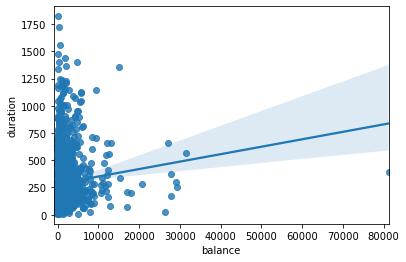

In [103]:
sns.regplot(data=bank, x='balance', y='duration')
plt.show()

## T2.3 Plot the Distribution of of Numerical Attributes

## T2.4 Combined Distribution of Attributes